# Subgráficos
Es posible dibujar varios gráficos en un mismo canvas. Esto se logra a través de los subgráficos (o subplots). 
- Cada subgráfico se encontrará en una variable. Con esta yo puedo acceder a los metodos de graficación y personalización de solamente ese subgráfico.
- Los subgráficos se acomodan en una cuadrícula de dimensiones predefinidas.
- En este momento vamos a diferenciar dos tipos de métodos. **Métodos de Figura**: Alteran propiedades de todo el canvas. **Métodos de Axes** (O gráficos): Alteran propiedades de solamente un subgráfico.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Algunos ambientes van a necesitar este modo para poder visualizar los graficos de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [14]:
df = pd.read_csv('../data/tiendas_procesado.csv', index_col='fecha')
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


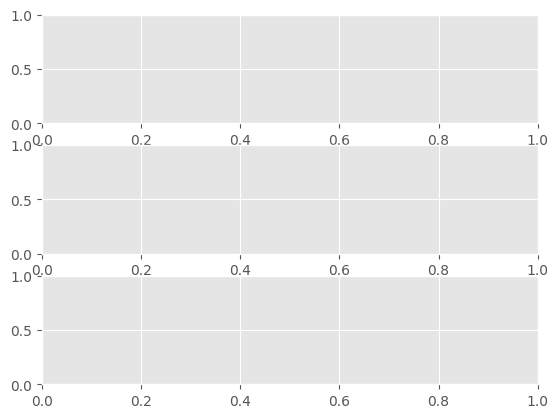

In [15]:
# Subgráficos
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(3, 1)

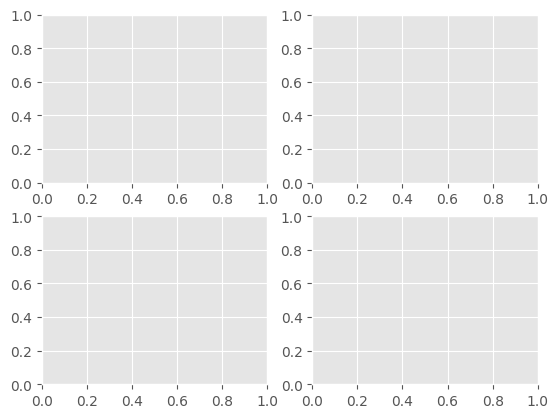

In [16]:
fig, axes = plt.subplots(2, 2)

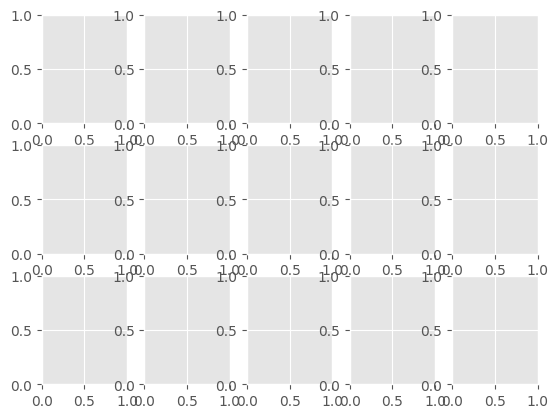

In [17]:
fig, axes = plt.subplots(3, 5)

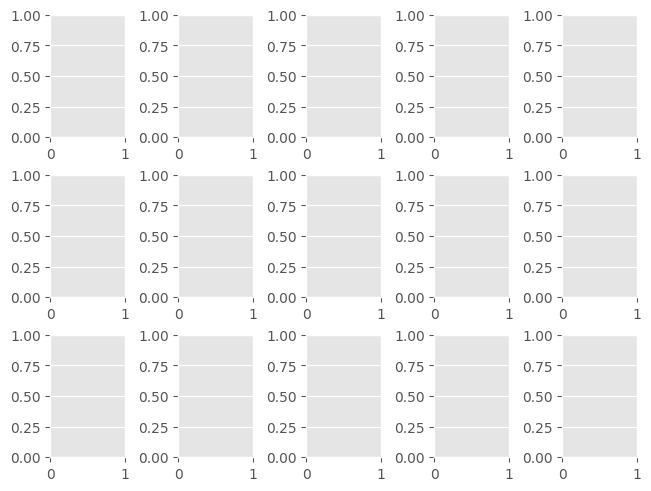

In [18]:
fig, axes = plt.subplots(3, 5, constrained_layout=True)

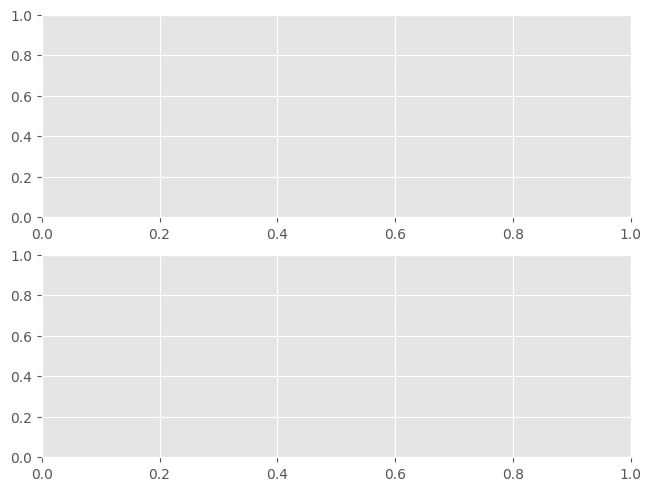

In [19]:
# Desempacando los subgraficos en variables individuales
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

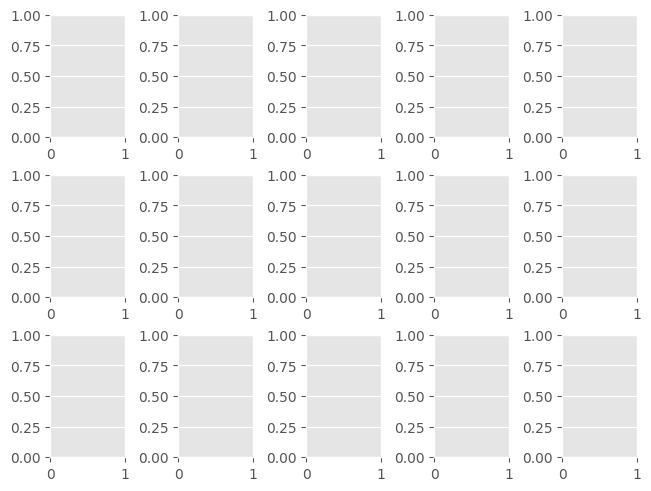

In [20]:
# Desempacando los subgraficos en variables individuales
fig, (
    (ax11, ax12, ax13, ax14, ax15),
    (ax21, ax22, ax23, ax24, ax25),
    (ax31, ax32, ax13, ax34, ax35)
) = plt.subplots(3, 5, constrained_layout=True)

# Pandas

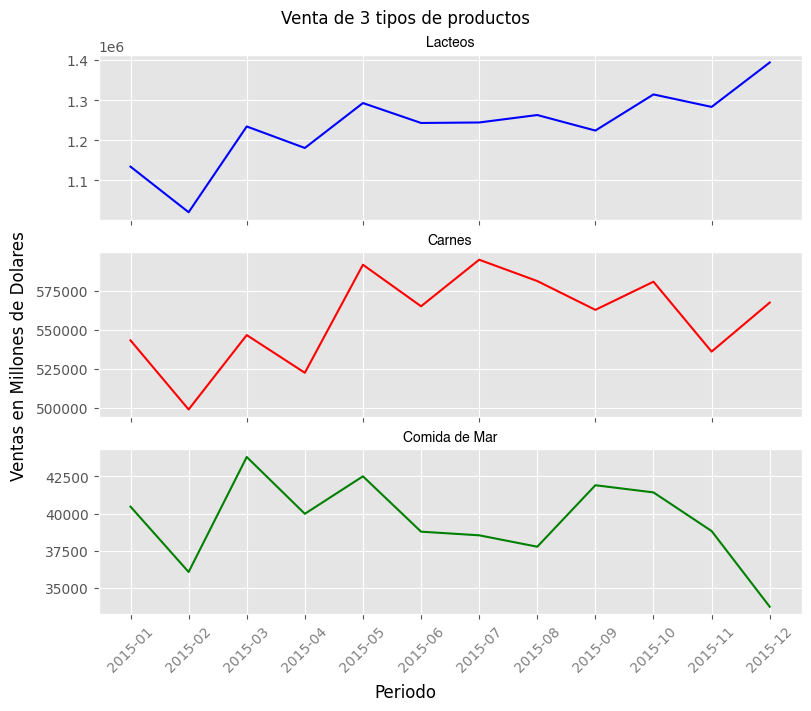

In [21]:
plt.style.use('ggplot')

# Subgráficos
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, (ax1, ax2, ax3) = plt.subplots(
    3, # Numero de filas
    1, # Numero de Columnas
    constrained_layout=True # Permite que los subgraficos dejen espacio para los titulos y los ejes
)

# Si quisiera un grid 2x2 seria asi:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_size_inches(8, 7) # Cambia la manera de definir el tamaño de todo el Canvas
fig.suptitle('Venta de 3 tipos de productos') # Titulo de todo el Canvas
fig.supylabel('Ventas en Millones de Dolares') # Titulo del Eje Y de todo el Canvas
fig.supxlabel('Periodo') # Titulo del Eje X de todo el Canvas

df.plot.line(
    y='DAIRY',
    ax=ax1, # Le digo en que Subplot ira este gráfico
    color='blue'
)

df.plot.line(
    y='MEATS',
    ax=ax2,
    color='red'
)
 
df.plot.line(
    y='SEAFOOD',
    ax=ax3,
    color='green'
)

# Todo se maneja igual a como hemos visto en cada Eje

# Seteo un titulo diferente para cada subplot
ax1.set_title(
    'Lacteos',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)
ax2.set_title(
    'Carnes',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)
ax3.set_title(
    'Comida de Mar',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)

# Solo voy a mostrar los ticks en el ultimo subplot ya que todos los gráficos comparten el Eje X
ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

ax3.set_xticks(np.arange(0, len(df))) 
ax3.set_xticklabels(
    df.index.values, 
    rotation=45,
    fontdict={
        'color':  'grey',
        'size': 10
    }
)

# Yo ya no necesito leyendas 
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

plt.show()

# Seaborn

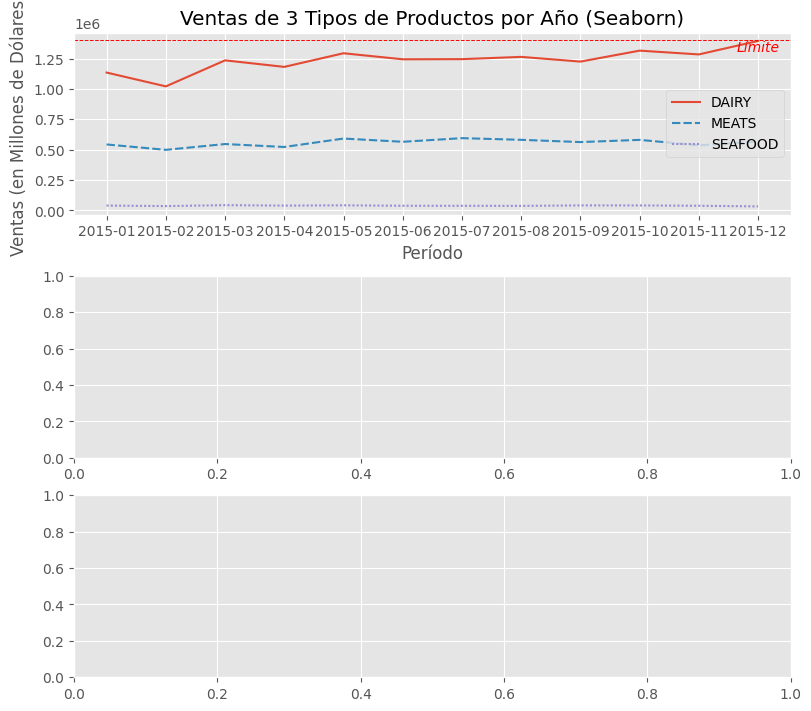

In [22]:
# Subgráficos
# Es exactamente lo mismo!
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
    3,
    1, 
    constrained_layout=True
)

fig.set_size_inches(8, 7)

sns.lineplot(
    data=df,
    ax=ax1
)

ax1.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

ax1.axhline(
    1400000,
    linestyle='dashed',
    color='red',
    alpha=1,
    linewidth=0.7
)

ax1.annotate(
    'Límite', # El texto
    xy = (11, 1400000),
    xytext = (11, 1400000), 
    size=10, 
    color='red',
    horizontalalignment='center',
    verticalalignment='top',
    fontstyle='italic'
)

plt.show()

# Plotly Express

In [23]:
df2 = df.melt(value_vars=['DAIRY', 'SEAFOOD', 'MEATS'], var_name='family', ignore_index=False)
df2

,family,value
fecha,,
2015-01,DAIRY,1.134521e+06
2015-02,DAIRY,1.020747e+06
2015-03,DAIRY,1.234851e+06
2015-04,DAIRY,1.181180e+06
2015-05,DAIRY,1.293308e+06
2015-06,DAIRY,1.243588e+06
2015-07,DAIRY,1.244815e+06
2015-08,DAIRY,1.263428e+06
2015-09,DAIRY,1.224619e+06


In [24]:
# Plotly Express no soporta Subplots a un nivel de personalización como Matplotlib
# Sin embargo, podemos definir subplots automáticamente a partir de una columna con Facet Plots
# https://plotly.com/python/facet-plots/

fig = px.line(
    df2, 
    width=800, 
    height=800,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    facet_row = 'family' # Crea una fila por cada propiedad diferente en esta columna
    #facet_col = 'family' # Crea una columna por cada propiedad diferente en esta columna
)

fig.show()

# Plotly Graph Objects

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=df.index.values,
    y=df['DAIRY'],
    name='LACTEOS'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=df.index.values,
    y=df['MEATS'],
    name='CARNES'
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=df.index.values,
    y=df['SEAFOOD'],
    name='COMIDA DE MAR'
), row=3, col=1)


fig.update_layout(height=600, width=700, title_text="Ventas de 3 Tipos de Productos por Año")
fig.show()